         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38      122.8     1001.0    0.11840   
1    842517         M      20.57      17.77      132.9     1326.0    0.08474   
2  84300903         M      19.69      21.25      130.0     1203.0    0.10960   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33       184.6   
1    0.07864     0.0869    0.07017  ...       24.99       23.41       158.8   
2    0.15990     0.1974    0.12790  ...       23.57       25.53       152.5   

   Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  Feature_29  \
0      2019.0      0.1622      0.6656      0.7119      0.2654      0.4601   
1      1956.0      0.1238      0.1866      0.2416      0.1860      0.2750   
2      1709.0      0.1444      0.4245      0.4504      0.2430      0.3613   

   Feature_30  
0     0.11890  
1     0.08902  
2    

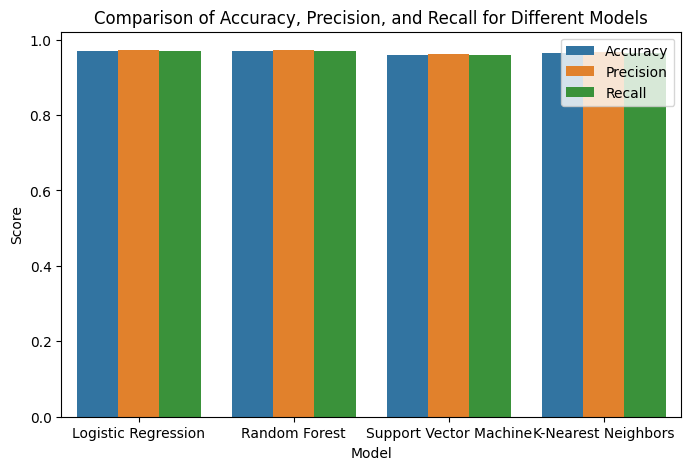

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)
print(data.head(3))

# Drop the 'ID' column
data = data.drop('ID', axis=1)

# Convert 'Diagnosis' to binary (Malignant = 1, Benign = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target variable
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
}

# Train and Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(report['weighted avg']['precision'])
    results["Recall"].append(report['weighted avg']['recall'])
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=1)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

results_df = pd.DataFrame(results)
results_melted = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Comparison of Accuracy, Precision, and Recall for Different Models')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()
